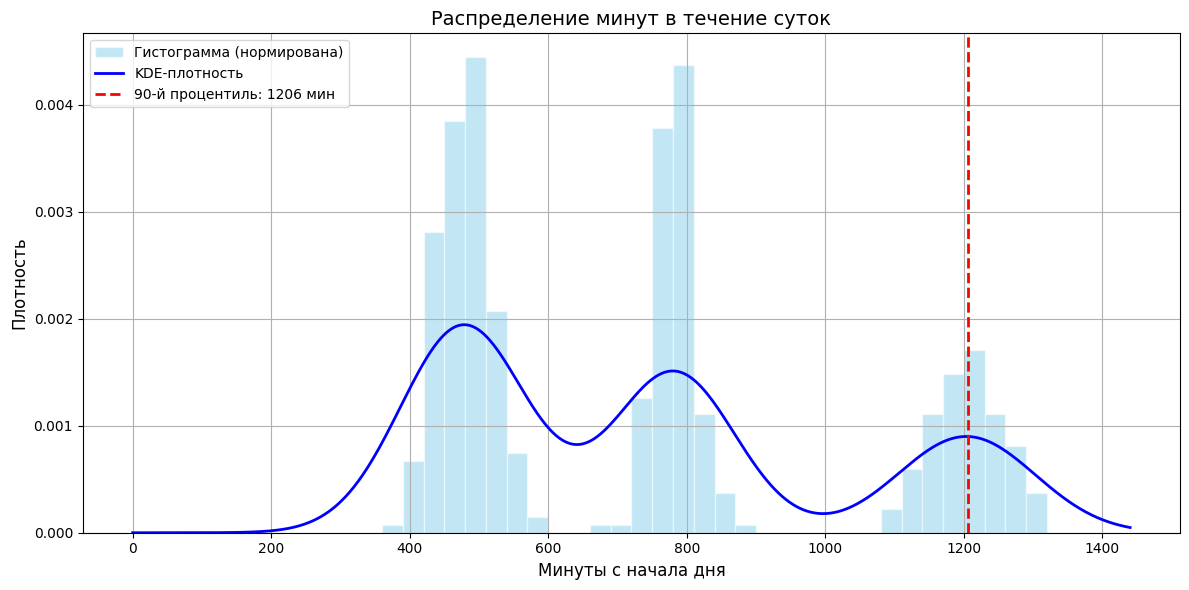

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. Генерируем искусственные данные — "минуты" в течение суток
np.random.seed(42)
data = np.concatenate([
    np.random.normal(480, 40, 200),    # Утро (8:00)
    np.random.normal(780, 30, 150),    # День (13:00)
    np.random.normal(1200, 50, 100)    # Вечер (20:00)
])
data = np.clip(data, 0, 1440)  # Обрезаем значения от 0 до 1440 минут (сутки)

# 2. Создаём DataFrame
df = pd.DataFrame({'minutes': data})

# 3. Вычисляем KDE
density = gaussian_kde(df['minutes'])

# 4. Точки для оси X (от 0 до 1440 минут)
x = np.linspace(0, 1440, 1440)

# 5. 90-й процентиль
percentile_90 = np.percentile(df['minutes'], 90)

# 6. Строим график
plt.figure(figsize=(12, 6))

# --- Гистограмма с нормировкой ---
plt.hist(df['minutes'], bins=48, range=(0, 1440), density=True, # 1440 количество минут в сутках, 48 корзин по 30 минут
         alpha=0.5, color='skyblue', edgecolor='white', label='Гистограмма (нормирована)')

# --- Плотность KDE ---
plt.plot(x, density(x), color='blue', linewidth=2, label='KDE-плотность')

# --- Вертикальная линия на 90-м процентиле ---
plt.axvline(x=percentile_90, color='red', linestyle='--', linewidth=2,
            label=f'90-й процентиль: {int(percentile_90)} мин')

# --- Подписи ---
plt.title("Распределение минут в течение суток", fontsize=14)
plt.xlabel("Минуты с начала дня", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()